Ноутбук для защиты поделенный на акты

Использование класса qa_qc_kern в ручном режиме

In [1]:
# Импортируем зависимости
import pandas as pd
import time

# Импортируем классы
from qa_qc_lib.qa_qc_kern import QA_QC_kern

Примеры использования

Тест предназначен для оценки соответствия типовой
для данного кроссплота и полученной аппроксимации.
В данном случае зависимость линейная по функции y=a*x+b, при этом a<0

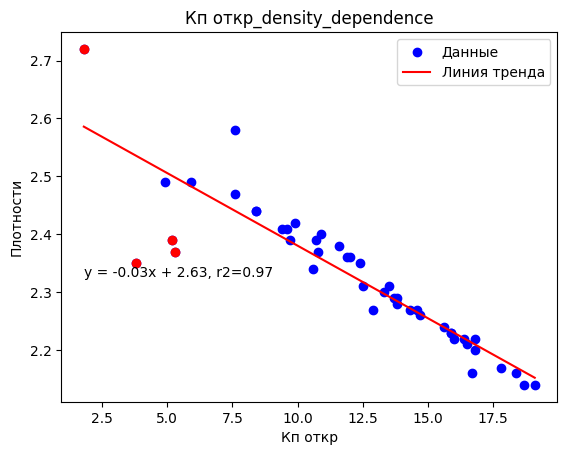

     Тест пройден успешно.
     Зависимость выполняется. Выпадающие точки ([2], [0, 18, 25])
--- 0.5154623985290527 seconds ---


In [2]:
#Верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/Density-PoroOK(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]]
x=df["Density, g/cc"].to_numpy()
y=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(density=x, porosity_open=y,file_path=path)
tests.test_kp_density_dependence()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

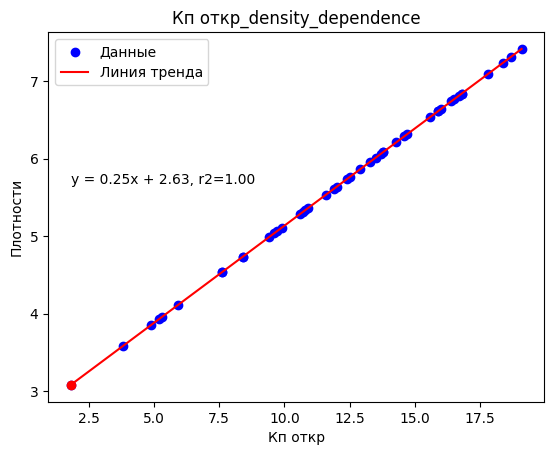

     Тест не пройден.
     Зависимость не выполняется. Выпадающие точки ([], [])
--- 0.16282868385314941 seconds ---


In [3]:
#Не верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/Density-PoroFail(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]]
x=df["Density, g/cc"].to_numpy()
y=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(density=x, porosity_open=y,file_path=path)
tests.test_kp_density_dependence()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест проводится для оценки отсутствия монотонности интервалов долбления.
Т.е., подошва вышележащего интервала долбления должна быть выше или равна кровле нижележащего

In [15]:
#Верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazOK.xlsx")
df=df[["Top","Bottom"]]
x=df["Top"].to_numpy()
y=df["Bottom"].to_numpy()
path="report\\"
tests = QA_QC_kern(top=x, bottom=y, file_path=path)
tests.test_coring_depths_first()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест пройден успешно.
     Все данные монотонны
--- 0.025999069213867188 seconds ---


In [16]:
#Не верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazFail.xlsx")
df=df[["Top","Bottom"]]
x=df["Top"].to_numpy()
y=df["Bottom"].to_numpy()
path="report\\"
tests = QA_QC_kern(top=x, bottom=y, file_path=path)
tests.test_coring_depths_first()
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     ЗИндексы выпадающие из монотонности [38, 40]
--- 0.02099895477294922 seconds ---


Тест оценивает величину суммарную насыщения водой и нефтью, которая не должна привышать 100% или 1 в долях

In [19]:
#Верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazOK.xlsx")
df=df[["So","Sw"]]
x=df["So"].to_numpy()
y=df["Sw"].to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест пройден успешно.
     Все данные корректны
--- 0.025999069213867188 seconds ---


In [20]:
#Не верные данные
start_time = time.time()
df=pd.read_excel("data/defence_data/kern/59PObrazFail.xlsx")
df=df[["So","Sw"]]
x=df["So"].to_numpy()
y=df["Sw"].to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Индексы выпадающих значений[1]
--- 0.023022174835205078 seconds ---


Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 47,6]

In [30]:
#Верные данные
df=pd.read_excel("data/defence_data/kern/SwOK(N).xlsx")
arr=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.test_open_porosity()
tests.generate_test_report()


     Тест пройден успешно.
     Все данные лежат в интервале от 0 до 47.6
------------------------------------------------------------------------------------


In [33]:
#Не верные данные
df=pd.read_excel("data/defence_data/kern/SwFail(N).xlsx")
arr=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.test_open_porosity()
tests.generate_test_report()

[ 5.2  7.6  1.8 11.9 13.8 15.6 16.  16.5 13.8 15.9 13.3 50.9 14.7 14.6
  8.4 96.7 12.5 13.5  3.8  3.2  4.9 10.9 11.6 12.4  5.9  5.3 12.9 18.7
 10.8 16.8 18.4  9.6 17.8 16.7 19.1 14.3 16.4 10.6  9.4 13.7  8.4  7.6
  9.9 16.8 10.7 12. ]

     Тест не пройден.
     Данные с индексом [11, 15] лежат не в интервале от 0 до 47,6.
------------------------------------------------------------------------------------


Использование класса qa_qc_kern в автоматическом режиме

In [35]:
# Импортируем классы
from qa_qc_lib.data_preprocessing_kern import DataPreprocessing

In [37]:
columns_mapping = {
    "Лабораторный номер":["data\\data_1.xlsx->Number"],
    "Карбонатность":["data\\data_1.xlsx->Carbonate"],
    "Кп откр":["data\\data_1.xlsx->Porosity (open)"],
    "Открытая пористость по керосину":["data\\data_1.xlsx->Porosity (kerosine)"],
    "Параметр пористости(F)":["data\\data_2.xlsx->Рп"],
    "Плотность абсолютно сухого образца":["data\\data_1.xlsx->Density, g/cc"],
    "Направление":["data\\data_1.xlsx->Направление"]
}
file_modal = DataPreprocessing()
test=file_modal.process_data(columns_mapping)
print(test)
file_modal.start_tests(test)
file_modal.save_to_excel()

{'Карбонатность': ['test_carbonation', 'test_correctness_of_p_sk_kp'], 'Плотность абсолютно сухого образца': ['test_correctness_of_p_sk_kp', 'test_kp_density_dependence'], 'Кп откр': ['test_correctness_of_p_sk_kp', 'test_kp_density_dependence', 'test_open_porosity', 'test_rp_kp_dependencies'], 'Открытая пористость по керосину': ['test_porosity_kerosine'], 'Параметр пористости(F)': ['test_rp_kp_dependencies']}


Использование класса qa_qc_cubes в ручном режиме (без коннектора)

In [38]:
 # Импортируем зависимости
import pandas as pd
import time

# Импортируем классы
from qa_qc_lib.qa_qc_cubes import QA_QC_cubes

Тесты первого порядка

In [40]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    open_porosity_file_path="data/grdecl_data/input/Poro.GRDECL.grdecl",
    save_wrong_data_path="report"
)
cubes.test_open_porosity()
print("--- %s seconds ---" % (time.time() - start_time))

data/grdecl_data/input/Poro.GRDECL.grdecl -> PORO
Тест пройден
--- 6.694727182388306 seconds ---


In [41]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    open_perm_x_file_path="data/grdecl_data/input/Perm.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_permeability(name_type_data="PermX")
print("--- %s seconds ---" % (time.time() - start_time))

data/grdecl_data/input/Perm.GRDECL.grdecl -> PERMX
Файл WRONG_ACTNUM сохранён по пути: report
Тест не пройден Данные < 0
--- 6.991643667221069 seconds ---


In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    swl_file_path ="data/grdecl_data/input/Swl.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_range_data(name_type_data="SWL")
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    save_wrong_data_path="report"
)

cubes.test_range_integer_data()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    litatype_file_path="data/grdecl_data/input/litho.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_integer_data()
print("--- %s seconds ---" % (time.time() - start_time))

Тесты второго порядка

In [43]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    swl_file_path="data/grdecl_data/input/Swl.GRDECL.grdecl",
    sg_file_path="data/grdecl_data/input/Sg.GRDECL.grdecl",
    so_file_path="data/grdecl_data/input/So.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_sum_cubes(["SWL","So","Sg"])
print("--- %s seconds ---" % (time.time() - start_time))

data/grdecl_data/input/Swl.GRDECL.grdecl -> IRR.WATERSATURATION
data/grdecl_data/input/So.GRDECL.grdecl -> SOIL
data/grdecl_data/input/Sg.GRDECL.grdecl -> SGAS
Тест не пройден Cумма кубов != 1
Файл WRONG_ACTNUM сохранён по пути: report
--- 7.760942697525024 seconds ---


In [44]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    swcr_file_path="data/grdecl_data/input/Swcr.GRDECL.grdecl",
    swl_file_path="data/grdecl_data/input/Swl.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_affiliation_swcr()
print("--- %s seconds ---" % (time.time() - start_time))

data/grdecl_data/input/Swl.GRDECL.grdecl -> IRR.WATERSATURATION
data/grdecl_data/input/Swcr.GRDECL.grdecl -> CRITICALWATERSATURATION
Тест не пройден Данные < SWL 
Файл WRONG_ACTNUM сохранён по пути: report
--- 7.4677770137786865 seconds ---


In [45]:
start_time = time.time()
cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    sw_file_path="data/grdecl_data/input/Sw.GRDECL.grdecl",
    swl_file_path="data/grdecl_data/input/Swl.GRDECL.grdecl",
    save_wrong_data_path="report"
)

cubes.test_swl_sw()
print("--- %s seconds ---" % (time.time() - start_time))

data/grdecl_data/input/Sw.GRDECL.grdecl -> SWAT
data/grdecl_data/input/Swl.GRDECL.grdecl -> IRR.WATERSATURATION
Файл WRONG_ACTNUM сохранён по пути: report
Тест не пройден Данные <= SWL 
--- 7.54349684715271 seconds ---


Использование класса qa_qc_cubes в ручном режиме (c коннектора)

In [46]:
# Импортируем зависимости
import pandas as pd
import time

# Импортируем классы
from qa_qc_lib.qa_qc_kern import QA_QC_kern
from qa_qc_lib.qa_qc_cubes import QA_QC_cubes

In [47]:
start_time = time.time()
df = pd.read_excel(
    "data/grdecl_data/test_data_kern-cubes.xlsx",
    sheet_name="Лист2"
)
kpr = df["Кпр_абс"].to_numpy()
kp = df["Кп_откр"].to_numpy()
lit = df["Скважина"].to_numpy()
kern = QA_QC_kern(kpr=kpr, porosity_open=kp,lithotype=lit)

cubes = QA_QC_cubes(
    directory_path="data/grdecl_data",
    grid_name="GRID",
    qa_qc_kern=kern,
    open_porosity_file_path="data/grdecl_data/input/Poro.GRDECL.grdecl",
    open_perm_x_file_path="data/grdecl_data/input/Perm.GRDECL.grdecl",
    litatype_file_path="data/grdecl_data/input/litho.GRDECL.grdecl")

cubes.test_kern_data_dependence_kpr_kp()
print("--- %s seconds ---" % (time.time() - start_time))

data/grdecl_data/input/Poro.GRDECL.grdecl -> PORO
data/grdecl_data/input/Perm.GRDECL.grdecl -> PERMX
data/grdecl_data/input/litho.GRDECL.grdecl -> LITHOLOGIES
Скважина -1.0 не прошла тест
Скважина 1.0 не прошла тест
Скважина 1.5 не прошла тест
Скважина 2.0 не прошла тест
Скважина 3.0 не прошла тест
Тест не пройден!!!
--- 7.585860967636108 seconds ---
